<a href="https://colab.research.google.com/github/songiangvn/Continuous-blood-pressure-monitoring/blob/main/Deep%20Learning%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mkachuee/BloodPressureDataset")

print("Path to dataset files:", path)

100%|██████████| 4.60G/4.60G [03:12<00:00, 25.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mkachuee/BloodPressureDataset/versions/5


In [ ]:
import os # system-wide functions
os.listdir('/root/.cache/kagglehub/datasets/mkachuee/BloodPressureDataset/versions/5')

['part_9.mat',
 'part_10.mat',
 'part_6.mat',
 'part_12.mat',
 'part_4.mat',
 'part_8.mat',
 'part_2.mat',
 'part_5.mat',
 'part_1.mat',
 'part_7.mat',
 'part_11.mat',
 'part_3.mat',
 'Samples']

In [ ]:
# defining our evaluation error function
def rmse(y_true, y_pred):
    """Computes the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
os.chdir("/root/.cache/kagglehub/datasets/mkachuee/BloodPressureDataset/versions/5")

In [ ]:
ecg =[]
bp_min = [] # dbp
bp_max = [] # sbp
ppg = []
bp = []
sample_size  = 125
for i in range(1):
    data = scipy.io.loadmat(f"part_{i+1}.mat")['p']
    for i in range(1000):
        temp_mat = data[0 , i]
        temp_length = temp_mat.shape[1]
        for j in range((int)(temp_length/sample_size)):
            temp_ecg = temp_mat[2, j*sample_size:(j+1)*sample_size]
            temp_bp = temp_mat[1, j*sample_size:(j+1)*sample_size]
            temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
            ecg.append(temp_ecg)
            ppg.append(temp_ppg)
            bp.append(temp_bp)
            bp_min.append(np.min(temp_bp))
            bp_max.append(np.max(temp_bp))

In [ ]:
res = pd.DataFrame({"ecg": ecg , "ppg": ppg, "bp": bp, "blood_presure_min":bp_min , "blood_presure_max":bp_max})
res.head()

,ecg,ppg,bp,blood_presure_min,blood_presure_max
0,"[-0.06060606060606061, -0.07526881720430108, -...","[1.7595307917888563, 1.718475073313783, 1.6842...","[67.0629551659967, 69.3586280667992, 75.366452...",66.525670,124.601310
1,"[-0.1402737047898338, -0.15053763440860216, -0...","[1.7321603128054741, 1.6871945259042034, 1.649...","[66.9652669574519, 69.55400448388878, 75.75720...",65.597632,120.986846
2,"[-0.015151515151515152, 0.029814271749755622, ...","[1.619745845552297, 1.5933528836754642, 1.5728...","[76.19680266493434, 86.25868814504746, 96.8090...",66.134917,122.354481
3,"[0.009775171065493646, 0.07966764418377321, 0....","[1.6852394916911047, 1.653958944281525, 1.6275...","[94.6110299756268, 103.94025389165402, 110.827...",67.062955,122.745234
4,"[0.12463343108504399, 0.1495601173020528, 0.17...","[1.4740957966764419, 1.4496578690127078, 1.429...","[115.61399481275613, 118.2515764434654, 119.76...",67.502552,125.187439


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chuyển đổi dữ liệu thành numpy array
X_ecg = np.array(res["ecg"].tolist())  # Chuyển danh sách thành mảng numpy
X_ppg = np.array(res["ppg"].tolist())
y = np.array(res["blood_presure_min"].tolist())  # Hoặc max tùy theo mục tiêu dự đoán

# Chia train - validation (80% - 20%)
X_ecg_train, X_ecg_val, X_ppg_train, X_ppg_val, y_train, y_val = train_test_split(
    X_ecg, X_ppg, y, test_size=0.2, random_state=42, shuffle=True
)

print("X_ecg_train shape:", X_ecg_train.shape)
print("X_ppg_train shape:", X_ppg_train.shape)
print("y_train shape:", y_train.shape)

# Reshape dữ liệu cho Conv1D
X_ecg_train = X_ecg_train.reshape(-1, 125, 1)
X_ecg_val = X_ecg_val.reshape(-1, 125, 1)
X_ppg_train = X_ppg_train.reshape(-1, 125, 1)
X_ppg_val = X_ppg_val.reshape(-1, 125, 1)


X_ecg_train shape: (205190, 125)
X_ppg_train shape: (205190, 125)
y_train shape: (205190,)


In [ ]:
print("X_ecg shape:", X_ecg.shape)
print("X_ppg shape:", X_ppg.shape)
print("y shape:", y.shape)

print("X_ecg_train shape:", X_ecg_train.shape)
print("X_ppg_train shape:", X_ppg_train.shape)
print("y_train shape:", y_train.shape)
print("X_ecg_val shape:", X_ecg_val.shape)
print("X_ppg_val shape:", X_ppg_val.shape)
print("y_val shape:", y_val.shape)


X_ecg shape: (256488, 125)
X_ppg shape: (256488, 125)
y shape: (256488,)
X_ecg_train shape: (205190, 125, 1)
X_ppg_train shape: (205190, 125, 1)
y_train shape: (205190,)
X_ecg_val shape: (51298, 125, 1)
X_ppg_val shape: (51298, 125, 1)
y_val shape: (51298,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, ELU, Flatten, Concatenate
)

# **Branch 1: ECG**
input_ecg = Input(shape=(125, 1), name="ecg_input")
x1 = BatchNormalization()(input_ecg)
x1 = Conv1D(64, kernel_size=2, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x1)
x1 = Conv1D(32, kernel_size=4, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x1)
x1 = Conv1D(16, kernel_size=8, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x1)
x1 = Conv1D(16, kernel_size=4, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x1)
x1 = MaxPooling1D(pool_size=2, strides=2)(x1)
x1 = Flatten()(x1)

# **Branch 2: PPG**
input_ppg = Input(shape=(125, 1), name="ppg_input")
x2 = BatchNormalization()(input_ppg)
x2 = Conv1D(64, kernel_size=2, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x2)
x2 = Conv1D(32, kernel_size=4, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x2)
x2 = Conv1D(16, kernel_size=8, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x2)
x2 = Conv1D(16, kernel_size=4, strides=2, activation='elu', kernel_initializer='he_normal', padding='valid')(x2)
x2 = MaxPooling1D(pool_size=2, strides=2)(x2)
x2 = Flatten()(x2)

# **Kết hợp đầu ra của hai nhánh**
merged = Concatenate()([x1, x2])
merged = BatchNormalization()(merged)

# **LSTM Layer**
merged = tf.keras.layers.Reshape((1, merged.shape[1]))(merged)
lstm = LSTM(32, activation='tanh', return_sequences=False)(merged)

# **Fully Connected Layer**
dense = Dense(64, activation='relu')(lstm)
output = Dense(1, activation='linear')(dense)  # Dự đoán huyết áp

# **Xây dựng mô hình**
model = Model(inputs=[input_ecg, input_ppg], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# **In summary mô hình**
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ecg_input (InputLayer)    │ (None, 125, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ppg_input (InputLayer)    │ (None, 125, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 125, 1)         │              4 │ ecg_input[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 1)         │              4 │ ppg_input[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 62, 64)         │            192 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 62, 64)         │            192 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 30, 32)         │          8,224 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 30, 32)         │          8,224 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 12, 16)         │          4,112 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 12, 16)         │          4,112 │ conv1d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 5, 16)          │          1,040 │ conv1d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 5, 16)          │          1,040 │ conv1d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 2, 16)          │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 2, 16)          │              0 │ conv1d_7[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32)             │              0 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 32)             │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├──────────────────────

 Total params: 41,993 (164.04 KB)

 Trainable params: 41,861 (163.52 KB)

 Non-trainable params: 132 (528.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ====== Callbacks ======
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

# ====== Train Model ======
history = model.fit(
    [X_ecg_train, X_ppg_train], y_train,
    validation_data=([X_ecg_val, X_ppg_val], y_val),
    epochs=50, batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 502.4191 - mae: 13.6085

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 115s 17ms/step - loss: 502.2660 - mae: 13.6060 - val_loss: 89.7484 - val_mae: 6.6421
Epoch 2/50
6412/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.4587 - mae: 5.9599

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 140s 17ms/step - loss: 72.4578 - mae: 5.9599 - val_loss: 62.3681 - val_mae: 5.4594
Epoch 3/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.1602 - mae: 5.4569

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 143s 17ms/step - loss: 62.1594 - mae: 5.4568 - val_loss: 54.0055 - val_mae: 5.1224
Epoch 4/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56.0458 - mae: 5.1552

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 17ms/step - loss: 56.0452 - mae: 5.1551 - val_loss: 50.4365 - val_mae: 4.8863
Epoch 5/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.1539 - mae: 4.9764

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 17ms/step - loss: 52.1537 - mae: 4.9763 - val_loss: 47.7973 - val_mae: 4.6670
Epoch 6/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.5416 - mae: 4.8454

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 147s 17ms/step - loss: 49.5415 - mae: 4.8454 - val_loss: 45.0751 - val_mae: 4.6029
Epoch 7/50
6412/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.3661 - mae: 4.7202

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 104s 16ms/step - loss: 47.3661 - mae: 4.7202 - val_loss: 43.1938 - val_mae: 4.4335
Epoch 8/50
6410/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.2306 - mae: 4.6370

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 105s 16ms/step - loss: 46.2303 - mae: 4.6370 - val_loss: 41.9853 - val_mae: 4.3093
Epoch 9/50
6410/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.4533 - mae: 4.5538

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 139s 16ms/step - loss: 44.4534 - mae: 4.5538 - val_loss: 41.5831 - val_mae: 4.3324
Epoch 10/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 104s 16ms/step - loss: 43.9648 - mae: 4.5169 - val_loss: 41.8460 - val_mae: 4.3559
Epoch 11/50
6409/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.2107 - mae: 4.4543

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 144s 17ms/step - loss: 43.2104 - mae: 4.4543 - val_loss: 38.9765 - val_mae: 4.1800
Epoch 12/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.7390 - mae: 4.4035

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 104s 16ms/step - loss: 41.7391 - mae: 4.4035 - val_loss: 38.9624 - val_mae: 4.1124
Epoch 13/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 146s 17ms/step - loss: 41.0181 - mae: 4.3491 - val_loss: 42.3434 - val_mae: 4.3096
Epoch 14/50
6409/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.3641 - mae: 4.3068

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 102s 16ms/step - loss: 40.3644 - mae: 4.3069 - val_loss: 38.9470 - val_mae: 4.1420
Epoch 15/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.3037 - mae: 4.2682

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 145s 16ms/step - loss: 40.3037 - mae: 4.2682 - val_loss: 37.2674 - val_mae: 4.0294
Epoch 16/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.0184 - mae: 4.2336

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 139s 16ms/step - loss: 39.0186 - mae: 4.2336 - val_loss: 36.6273 - val_mae: 3.9312
Epoch 17/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 147s 17ms/step - loss: 39.4156 - mae: 4.2296 - val_loss: 37.1009 - val_mae: 4.0681
Epoch 18/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 139s 16ms/step - loss: 39.2182 - mae: 4.2015 - val_loss: 37.4295 - val_mae: 4.0545
Epoch 19/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.8351 - mae: 4.2071

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - loss: 38.8351 - mae: 4.2071 - val_loss: 35.9564 - val_mae: 3.9635
Epoch 20/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.7663 - mae: 4.1426

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 140s 16ms/step - loss: 37.7664 - mae: 4.1426 - val_loss: 35.9062 - val_mae: 3.9026
Epoch 21/50
6409/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.2076 - mae: 4.1378

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 145s 17ms/step - loss: 38.2073 - mae: 4.1378 - val_loss: 35.5318 - val_mae: 3.9117
Epoch 22/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 141s 17ms/step - loss: 37.6246 - mae: 4.1233 - val_loss: 35.5546 - val_mae: 3.8790
Epoch 23/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.8502 - mae: 4.0785

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 140s 16ms/step - loss: 36.8505 - mae: 4.0785 - val_loss: 34.8374 - val_mae: 3.8348
Epoch 24/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.1421 - mae: 4.0478

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 143s 16ms/step - loss: 36.1425 - mae: 4.0479 - val_loss: 34.6925 - val_mae: 3.8658
Epoch 25/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - loss: 37.4758 - mae: 4.0981 - val_loss: 35.1857 - val_mae: 3.9429
Epoch 26/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 17ms/step - loss: 36.7928 - mae: 4.0664 - val_loss: 35.0893 - val_mae: 3.8384
Epoch 27/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 105s 16ms/step - loss: 36.7043 - mae: 4.0487 - val_loss: 35.6454 - val_mae: 3.8734
Epoch 28/50
6411/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.2181 - mae: 4.0249

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 105s 16ms/step - loss: 36.2180 - mae: 4.0249 - val_loss: 34.0162 - val_mae: 3.8135
Epoch 29/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 105s 16ms/step - loss: 35.4157 - mae: 4.0014 - val_loss: 35.5083 - val_mae: 3.9234
Epoch 30/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 103s 16ms/step - loss: 35.5510 - mae: 3.9953 - val_loss: 34.1814 - val_mae: 3.7461
Epoch 31/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 106s 16ms/step - loss: 34.8054 - mae: 3.9495 - val_loss: 35.1167 - val_mae: 3.8661
Epoch 32/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 140s 16ms/step - loss: 34.8130 - mae: 3.9739 - val_loss: 34.4888 - val_mae: 3.7736
Epoch 33/50
6409/6413 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.6245 - mae: 3.9523

6413/6413 ━━━━━━━━━━━━━━━━━━━━ 143s 16ms/step - loss: 34.6249 - mae: 3.9523 - val_loss: 32.9013 - val_mae: 3.6876
Epoch 34/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - loss: 34.8507 - mae: 3.9458 - val_loss: 34.0969 - val_mae: 3.7613
Epoch 35/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 141s 16ms/step - loss: 35.3802 - mae: 3.9553 - val_loss: 33.8682 - val_mae: 3.7954
Epoch 36/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 104s 16ms/step - loss: 34.6566 - mae: 3.9392 - val_loss: 34.4113 - val_mae: 3.7801
Epoch 37/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 146s 17ms/step - loss: 34.2385 - mae: 3.9204 - val_loss: 34.0290 - val_mae: 3.7572
Epoch 38/50
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 104s 16ms/step - loss: 34.5619 - mae: 3.9130 - val_loss: 33.7601 - val_mae: 3.7495


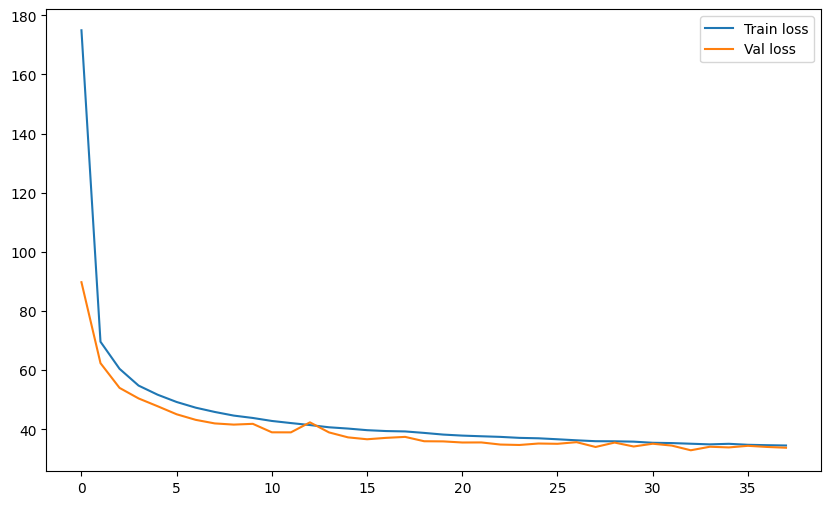

In [ ]:
# Vẽ biểu đồ huấn luyện
# Vẽ biểu đồ huấn luyện
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load mô hình với custom_objects
best_model = load_model('best_model.h5', custom_objects={"mse": MeanSquaredError()})


In [ ]:
# Đánh giá trên tập validation
val_loss, val_mae = best_model.evaluate([X_ecg_val, X_ppg_val], y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")


1604/1604 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 33.1796 - mean_absolute_error: 3.6968
Validation Loss: 32.9013, Validation MAE: 3.6876


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


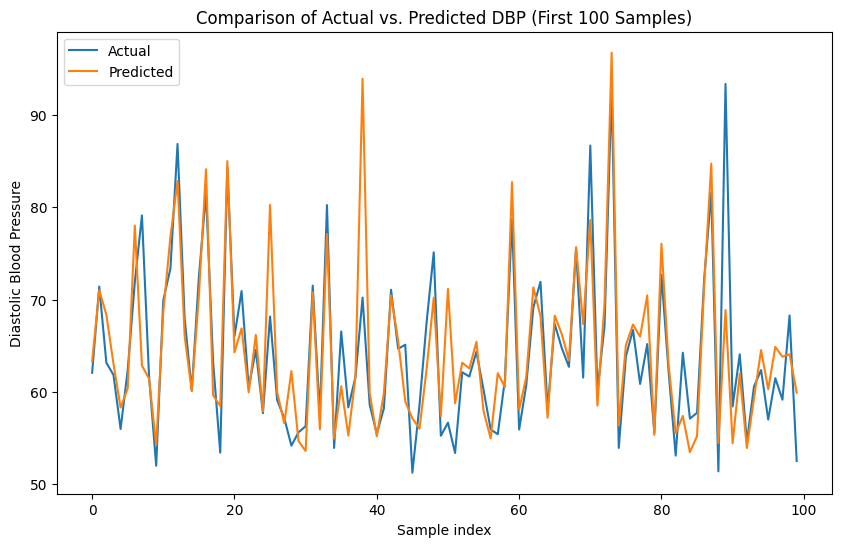

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm dự đoán giá trị
def model_forecast(model, X_input):
    return model.predict(X_input)

# Chọn 1,000 mẫu đầu tiên
num_samples = 100
X_ecg_sample = X_ecg_val[:num_samples]
X_ppg_sample = X_ppg_val[:num_samples]
y_sample = y_val[:num_samples]

# Dự đoán trên 1,000 mẫu đầu tiên
y_pred_sample = model_forecast(model, [X_ecg_sample, X_ppg_sample])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(y_sample, label="Actual")  # Vẽ giá trị thực tế
plt.plot(y_pred_sample, label="Predicted")  # Vẽ giá trị dự đoán
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Diastolic Blood Pressure")
plt.title("Comparison of Actual vs. Predicted DBP (First 100 Samples)")
plt.show()


# Systolic Blood Pressure

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Chuyển đổi dữ liệu thành numpy array
X_ecg = np.array(res["ecg"].tolist())  # Chuyển danh sách thành mảng numpy
X_ppg = np.array(res["ppg"].tolist())
y = np.array(res["blood_presure_max"].tolist())  # SBP

# Chia train - validation (85% - 15%)
X_ecg_train, X_ecg_val, X_ppg_train, X_ppg_val, y_train, y_val = train_test_split(
    X_ecg, X_ppg, y, test_size=0.15, random_state=42, shuffle=True
)

print("X_ecg_train shape:", X_ecg_train.shape)
print("X_ppg_train shape:", X_ppg_train.shape)
print("y_train shape:", y_train.shape)

# Reshape dữ liệu cho Conv1D
X_ecg_train = X_ecg_train.reshape(-1, 125, 1)
X_ecg_val = X_ecg_val.reshape(-1, 125, 1)
X_ppg_train = X_ppg_train.reshape(-1, 125, 1)
X_ppg_val = X_ppg_val.reshape(-1, 125, 1)


X_ecg_train shape: (218014, 125)
X_ppg_train shape: (218014, 125)
y_train shape: (218014,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense,
    Dropout, Flatten, Concatenate, GlobalAveragePooling1D, LayerNormalization
)

# **Branch 1: ECG**
input_ecg = Input(shape=(125, 1), name="ecg_input")
x1 = BatchNormalization()(input_ecg)
x1 = Conv1D(128, kernel_size=3, strides=1, activation='elu', padding='same')(x1)
x1 = Conv1D(64, kernel_size=3, strides=2, activation='elu', padding='same')(x1)
x1 = Conv1D(32, kernel_size=3, strides=2, activation='elu', padding='same')(x1)
x1 = MaxPooling1D(pool_size=2, strides=2)(x1)
x1 = GlobalAveragePooling1D()(x1)  # Dùng GAP thay vì Flatten
x1 = Dropout(0.3)(x1)

# **Branch 2: PPG**
input_ppg = Input(shape=(125, 1), name="ppg_input")
x2 = BatchNormalization()(input_ppg)
x2 = Conv1D(128, kernel_size=3, strides=1, activation='elu', padding='same')(x2)
x2 = Conv1D(64, kernel_size=3, strides=2, activation='elu', padding='same')(x2)
x2 = Conv1D(32, kernel_size=3, strides=2, activation='elu', padding='same')(x2)
x2 = MaxPooling1D(pool_size=2, strides=2)(x2)
x2 = GlobalAveragePooling1D()(x2)
x2 = Dropout(0.3)(x2)

# **Kết hợp hai nhánh**
merged = Concatenate()([x1, x2])
merged = BatchNormalization()(merged)
merged = LayerNormalization()(merged)  # Ổn định dữ liệu đầu vào LSTM
merged = tf.keras.layers.Reshape((1, merged.shape[1]))(merged)

# **LSTM Layer**
lstm = LSTM(64, activation='tanh', return_sequences=True)(merged)
lstm = LSTM(32, activation='tanh', return_sequences=False)(lstm)

# **Fully Connected Layer**
dense = Dense(64, activation='relu')(lstm)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# **Xây dựng mô hình**
model1 = Model(inputs=[input_ecg, input_ppg], outputs=output)
from tensorflow.keras.losses import Huber

model1.compile(optimizer='adam', loss=Huber(delta=1.0), metrics=['mae'])

# **In summary mô hình**
model1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ecg_input (InputLayer)    │ (None, 125, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ppg_input (InputLayer)    │ (None, 125, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 125, 1)         │              4 │ ecg_input[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 1)         │              4 │ ppg_input[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 125, 128)       │            512 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 125, 128)       │            512 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 63, 64)         │         24,640 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 63, 64)         │         24,640 │ conv1d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 32, 32)         │          6,176 │ conv1d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 32, 32)         │          6,176 │ conv1d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 16, 32)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 16, 32)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 32)             │              0 │ max_pooling1d[0][0]    │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 32)             │              0 │ max_pooling1d_1[0][0]  │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32)             │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 32)             │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concaten

 Total params: 110,665 (432.29 KB)

 Trainable params: 110,533 (431.77 KB)

 Non-trainable params: 132 (528.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ====== Callbacks ======
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

# ====== Train Model ======
history1 = model1.fit(
    [X_ecg_train, X_ppg_train], y_train,
    validation_data=([X_ecg_val, X_ppg_val], y_val),
    epochs=50, batch_size=32,
    callbacks=callbacks
)


Epoch 1/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 31.9860 - mae: 32.4815

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 321s 46ms/step - loss: 31.9832 - mae: 32.4787 - val_loss: 14.0908 - val_mae: 14.5825
Epoch 2/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 19.2042 - mae: 19.6986

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 294s 41ms/step - loss: 19.2041 - mae: 19.6986 - val_loss: 13.3782 - val_mae: 13.8706
Epoch 3/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18.5104 - mae: 19.0046

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 284s 42ms/step - loss: 18.5104 - mae: 19.0045 - val_loss: 12.2335 - val_mae: 12.7237
Epoch 4/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 17.7625 - mae: 18.2566

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 340s 44ms/step - loss: 17.7625 - mae: 18.2565 - val_loss: 11.1648 - val_mae: 11.6546
Epoch 5/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 285s 42ms/step - loss: 17.2552 - mae: 17.7490 - val_loss: 11.4348 - val_mae: 11.9245
Epoch 6/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 16.7632 - mae: 17.2566

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 322s 42ms/step - loss: 16.7631 - mae: 17.2566 - val_loss: 10.4422 - val_mae: 10.9306
Epoch 7/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.2392 - mae: 16.7329

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 285s 42ms/step - loss: 16.2392 - mae: 16.7329 - val_loss: 9.7699 - val_mae: 10.2579
Epoch 8/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 279s 41ms/step - loss: 15.9318 - mae: 16.4251 - val_loss: 10.0948 - val_mae: 10.5830
Epoch 9/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.6114 - mae: 16.1046

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 330s 42ms/step - loss: 15.6114 - mae: 16.1046 - val_loss: 9.4611 - val_mae: 9.9487
Epoch 10/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15.2790 - mae: 15.7721

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 284s 42ms/step - loss: 15.2790 - mae: 15.7721 - val_loss: 8.7058 - val_mae: 9.1920
Epoch 11/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 319s 41ms/step - loss: 14.9800 - mae: 15.4726 - val_loss: 9.5792 - val_mae: 10.0666
Epoch 12/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.6180 - mae: 15.1102

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 286s 42ms/step - loss: 14.6180 - mae: 15.1102 - val_loss: 8.2883 - val_mae: 8.7740
Epoch 13/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 320s 42ms/step - loss: 14.3721 - mae: 14.8645 - val_loss: 8.4300 - val_mae: 8.9153
Epoch 14/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.0961 - mae: 14.5882

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 316s 41ms/step - loss: 14.0961 - mae: 14.5882 - val_loss: 8.1689 - val_mae: 8.6537
Epoch 15/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 324s 41ms/step - loss: 13.9053 - mae: 14.3975 - val_loss: 8.1947 - val_mae: 8.6792
Epoch 16/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 321s 41ms/step - loss: 13.6987 - mae: 14.1909 - val_loss: 8.2921 - val_mae: 8.7768
Epoch 17/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.4338 - mae: 13.9256

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 275s 40ms/step - loss: 13.4338 - mae: 13.9256 - val_loss: 7.6304 - val_mae: 8.1140
Epoch 18/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 275s 40ms/step - loss: 13.1890 - mae: 13.6810 - val_loss: 8.3025 - val_mae: 8.7876
Epoch 19/50
6812/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.8792 - mae: 13.3708

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 281s 41ms/step - loss: 12.8792 - mae: 13.3708 - val_loss: 7.4906 - val_mae: 7.9741
Epoch 20/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 277s 41ms/step - loss: 12.6748 - mae: 13.1662 - val_loss: 7.5647 - val_mae: 8.0486
Epoch 21/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 280s 41ms/step - loss: 12.5964 - mae: 13.0876 - val_loss: 7.5717 - val_mae: 8.0553
Epoch 22/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.3232 - mae: 12.8141

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 322s 41ms/step - loss: 12.3232 - mae: 12.8141 - val_loss: 7.4377 - val_mae: 7.9208
Epoch 23/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.1503 - mae: 12.6411

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 282s 41ms/step - loss: 12.1503 - mae: 12.6411 - val_loss: 7.1108 - val_mae: 7.5927
Epoch 24/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 321s 41ms/step - loss: 11.9947 - mae: 12.4856 - val_loss: 7.1287 - val_mae: 7.6115
Epoch 25/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 320s 41ms/step - loss: 11.7682 - mae: 12.2589 - val_loss: 7.4177 - val_mae: 7.9001
Epoch 26/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 319s 41ms/step - loss: 11.6014 - mae: 12.0916 - val_loss: 7.6527 - val_mae: 8.1362
Epoch 27/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 319s 40ms/step - loss: 11.3950 - mae: 11.8854 - val_loss: 7.8395 - val_mae: 8.3241
Epoch 28/50
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 328s 41ms/step - loss: 11.2337 - mae: 11.7239 - val_loss: 7.3580 - val_mae: 7.8412


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load mô hình với custom_objects
best_model = load_model('best_model.h5', custom_objects={"mse": MeanSquaredError()})


In [ ]:
model1.save("sbp_trained_model.keras")

In [ ]:
# Đánh giá trên tập validation
val_loss, val_mae = best_model.evaluate([X_ecg_val, X_ppg_val], y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 7.1193 - mean_absolute_error: 7.6013
Validation Loss: 7.1108, Validation MAE: 7.5927


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step


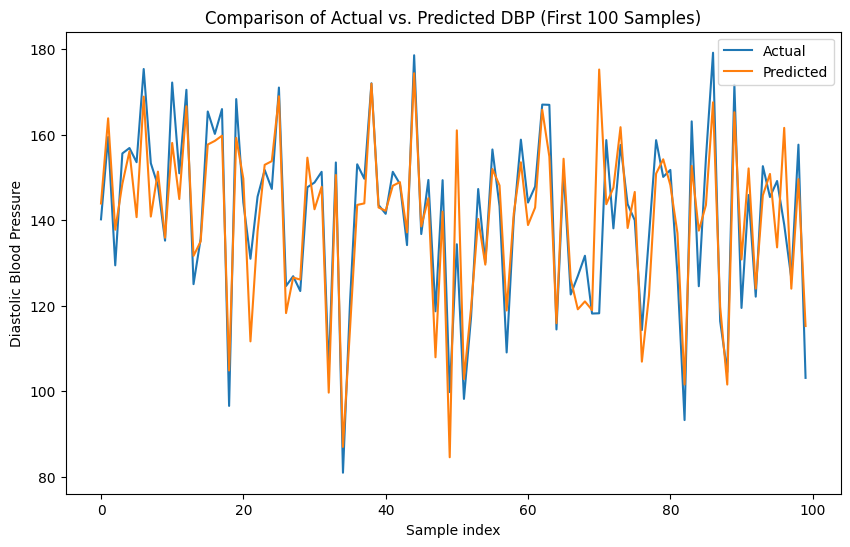

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm dự đoán giá trị
def model_forecast(model, X_input):
    return model.predict(X_input)

# Chọn 1,000 mẫu đầu tiên
num_samples = 100
X_ecg_sample = X_ecg_val[:num_samples]
X_ppg_sample = X_ppg_val[:num_samples]
y_sample = y_val[:num_samples]

# Dự đoán trên 1,000 mẫu đầu tiên
y_pred_sample = model_forecast(model1, [X_ecg_sample, X_ppg_sample])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(y_sample, label="Actual")  # Vẽ giá trị thực tế
plt.plot(y_pred_sample, label="Predicted")  # Vẽ giá trị dự đoán
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Diastolic Blood Pressure")
plt.title("Comparison of Actual vs. Predicted DBP (First 100 Samples)")
plt.show()


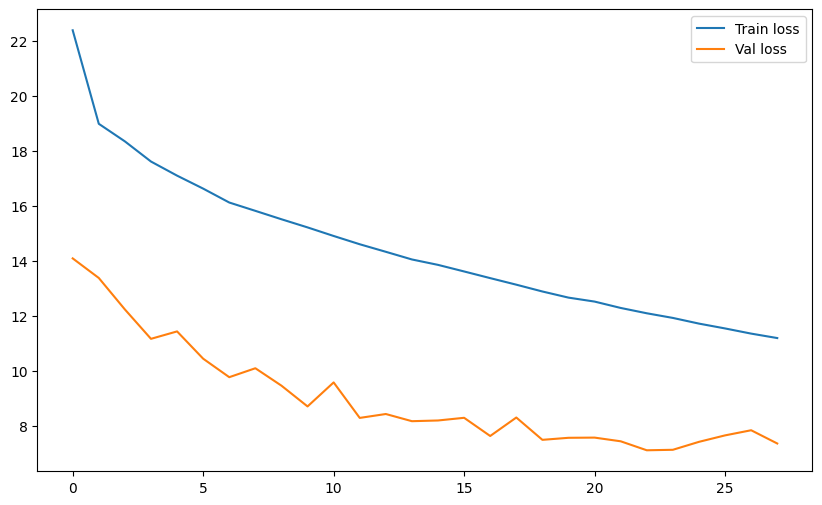

In [ ]:
# Vẽ biểu đồ huấn luyện
# Vẽ biểu đồ huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.show()

## Continue Training

In [ ]:
# ====== Train Model ======
history1 = model1.fit(
    [X_ecg_train, X_ppg_train], y_train,
    validation_data=([X_ecg_val, X_ppg_val], y_val),
    epochs=25, batch_size=32,
    callbacks=callbacks
)

Epoch 1/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 275s 40ms/step - loss: 11.9921 - mae: 12.4828 - val_loss: 7.3138 - val_mae: 7.7968
Epoch 2/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 272s 40ms/step - loss: 11.7849 - mae: 12.2756 - val_loss: 7.4836 - val_mae: 7.9667
Epoch 3/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 328s 41ms/step - loss: 11.5710 - mae: 12.0613 - val_loss: 7.1435 - val_mae: 7.6254
Epoch 4/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.3911 - mae: 11.8816

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 315s 40ms/step - loss: 11.3911 - mae: 11.8816 - val_loss: 7.0091 - val_mae: 7.4916
Epoch 5/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 279s 41ms/step - loss: 11.2367 - mae: 11.7266 - val_loss: 7.3408 - val_mae: 7.8235
Epoch 6/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 321s 41ms/step - loss: 11.0603 - mae: 11.5499 - val_loss: 7.2385 - val_mae: 7.7212
Epoch 7/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.8940 - mae: 11.3836

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 321s 41ms/step - loss: 10.8939 - mae: 11.3836 - val_loss: 6.6379 - val_mae: 7.1188
Epoch 8/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 324s 41ms/step - loss: 10.7400 - mae: 11.2296 - val_loss: 6.7506 - val_mae: 7.2321
Epoch 9/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.6077 - mae: 11.0969

6813/6813 ━━━━━━━━━━━━━━━━━━━━ 322s 41ms/step - loss: 10.6077 - mae: 11.0969 - val_loss: 6.5159 - val_mae: 6.9966
Epoch 10/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 279s 41ms/step - loss: 10.4568 - mae: 10.9457 - val_loss: 7.1356 - val_mae: 7.6176
Epoch 11/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 322s 41ms/step - loss: 10.2706 - mae: 10.7595 - val_loss: 6.6163 - val_mae: 7.0973
Epoch 12/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 315s 40ms/step - loss: 10.1482 - mae: 10.6366 - val_loss: 6.7905 - val_mae: 7.2711
Epoch 13/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 326s 40ms/step - loss: 10.0459 - mae: 10.5339 - val_loss: 6.8918 - val_mae: 7.3735
Epoch 14/25
6813/6813 ━━━━━━━━━━━━━━━━━━━━ 325s 41ms/step - loss: 9.8756 - mae: 10.3636 - val_loss: 6.7637 - val_mae: 7.2453


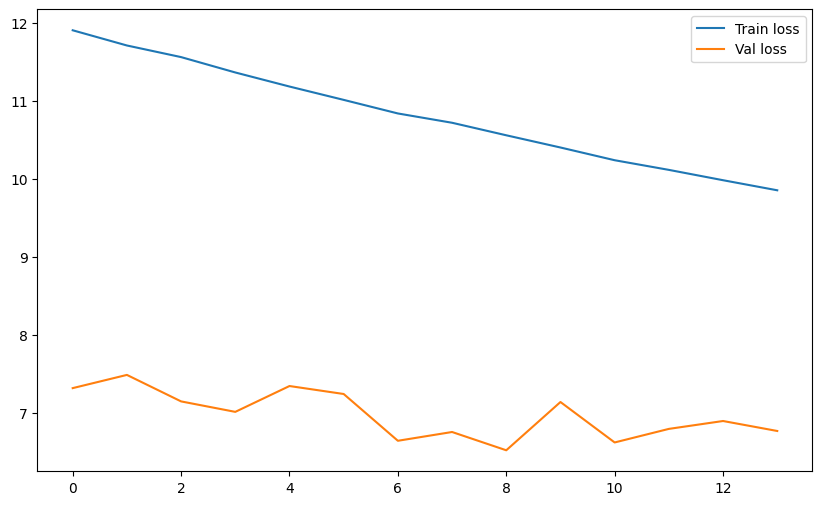

In [ ]:
# Vẽ biểu đồ huấn luyện
# Vẽ biểu đồ huấn luyện
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.show()

In [ ]:
model1.save("sbp_trained_model.keras")


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load mô hình với custom_objects
best_model = load_model('best_model.h5', custom_objects={"mse": MeanSquaredError()})


In [ ]:
# Đánh giá trên tập validation
val_loss, val_mae = best_model.evaluate([X_ecg_val, X_ppg_val], y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 6.5400 - mean_absolute_error: 7.0219
Validation Loss: 6.5159, Validation MAE: 6.9966


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


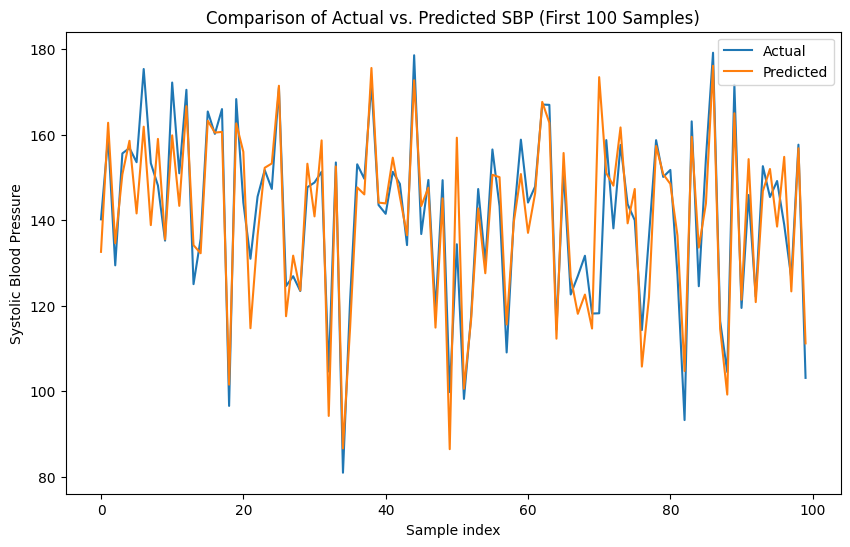

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm dự đoán giá trị
def model_forecast(model, X_input):
    return model.predict(X_input)

# Chọn 1,000 mẫu đầu tiên
num_samples = 100
X_ecg_sample = X_ecg_val[:num_samples]
X_ppg_sample = X_ppg_val[:num_samples]
y_sample = y_val[:num_samples]

# Dự đoán trên 1,000 mẫu đầu tiên
y_pred_sample = model_forecast(model1, [X_ecg_sample, X_ppg_sample])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(y_sample, label="Actual")  # Vẽ giá trị thực tế
plt.plot(y_pred_sample, label="Predicted")  # Vẽ giá trị dự đoán
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Systolic Blood Pressure")
plt.title("Comparison of Actual vs. Predicted SBP (First 100 Samples)")
plt.show()


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step


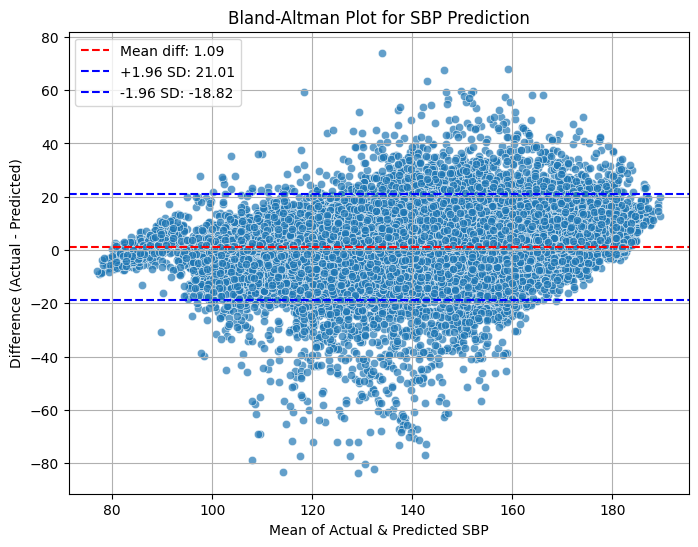

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 **Dự đoán trên tập test**
y_pred = model1.predict([X_ecg_val, X_ppg_val])
y_pred = y_pred  # Chuyển về giá trị thực
y_test_real = y_val  # Chuyển y_test về giá trị thực

# 🎯 **Tính toán giá trị trung bình và sai số**
mean_values = (y_test_real.flatten() + y_pred.flatten()) / 2
diff_values = y_test_real.flatten() - y_pred.flatten()  # Sai số dự đoán

mean_diff = np.mean(diff_values)  # Trung bình sai số
std_diff = np.std(diff_values)    # Độ lệch chuẩn của sai số
upper_limit = mean_diff + 1.96 * std_diff  # Giới hạn trên (+1.96 SD)
lower_limit = mean_diff - 1.96 * std_diff  # Giới hạn dưới (-1.96 SD)

# 🎯 **Vẽ Bland-Altman Plot**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mean_values, y=diff_values, alpha=0.7)
plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean diff: {mean_diff:.2f}')
plt.axhline(upper_limit, color='blue', linestyle='--', label=f'+1.96 SD: {upper_limit:.2f}')
plt.axhline(lower_limit, color='blue', linestyle='--', label=f'-1.96 SD: {lower_limit:.2f}')
plt.xlabel("Mean of Actual & Predicted SBP")
plt.ylabel("Difference (Actual - Predicted)")
plt.title("Bland-Altman Plot for SBP Prediction")
plt.legend()
plt.grid(True)

plt.show()


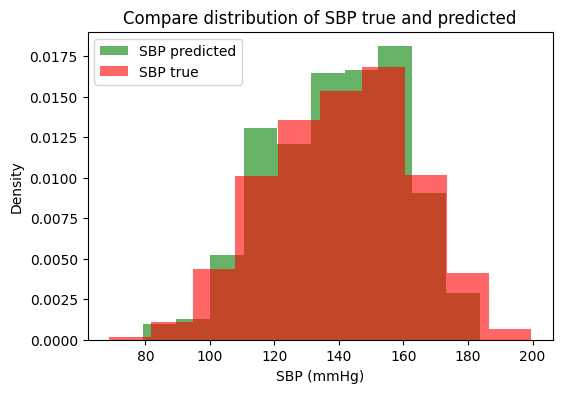

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(y_pred, color='g', alpha=0.6, label='SBP predicted', density=True)
ax.hist(y_test_real, color='r', alpha=0.6, label='SBP true', density=True)

ax.set_title("Compare distribution of SBP true and predicted")
ax.set_xlabel("SBP (mmHg)")
ax.set_ylabel("Density")
ax.legend()
plt.show()

In [ ]:
model1.save("sbp_trained_model.h5")


In [ ]:
from google.colab import files
files.download('sbp_trained_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model1.save('/content/drive/MyDrive/UROP_Blood_Pressure/sbp_trained_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
